## Gagan Chordia - 19BCE0788
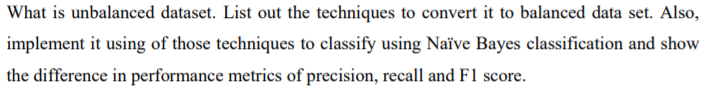

- An unbalanced dataset is a dataset where classes are distributed unequally. An unbalanced data can create problems in the classification task.
- Methods to convert unbalanced dataset to balanced dataset:
    1. Undersampling: It resamples the majority class points in the data to make them equal to the minority class points. The major disadvantage of undersampling is that we don’t use a significant chunk of data. Therefore, we’re losing data, and as a result, we’ll not get significant results.
    2. Oversampling: It resamples the minority class points in the data to make them equal to majority class points. Repetition of minority class points is one type of oversampling technique.
    3. Creating Synthetic data: The problem with repeating data is that it does not provide any extra information. One way to increase the information about the data is by creating synthetic data points.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, f1_score, recall_score

In [2]:
data = pd.read_csv('creditcard.csv')
col_names = data.columns
feature_cols = col_names[:-1]
df_negative = data[data[col_names[-1]]==0]
df_positive = data[data[col_names[-1]]==1]

In [3]:
x = data[feature_cols]
y = data[col_names[-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

In [4]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [5]:
y_pred = model.predict(x_test)

In [6]:
pa = precision_score(y_test, y_pred)
ra = recall_score(y_test, y_pred)
f1a = f1_score(y_test, y_pred)
print("Precision: ", pa)
print("Recall: ", ra)
print("F1: ", f1a)

Precision:  0.18855218855218855
Recall:  0.7044025157232704
F1:  0.297476759628154


In [7]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 30)

In [9]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [10]:
y_pred = model.predict(x_test)

In [11]:
pb = precision_score(y_test, y_pred)
rb = recall_score(y_test, y_pred)
f1b = f1_score(y_test, y_pred)
print("Precision: ", pb)
print("Recall: ", rb)
print("F1: ", f1b)

Precision:  0.9872252725642277
Recall:  0.7368081159148017
F1:  0.8438300533184517


In [12]:
print('Differences')
print("Precision: ", pb - pa)
print("Recall: ", rb - ra)
print("F1: ", f1b - f1a)

Differences
Precision:  0.7986730840120391
Recall:  0.03240560019153127
F1:  0.5463532936902977
